# Example: Fuzzy c-means clustering and silhouette coefficients

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples

from skxtend.clustering import FuzzyCMeans
from skxtend.graphics import silhouette_plot

%matplotlib inline

In [2]:
RANDOM_STATE = 0

## Generating data

Generate sample data

In [3]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=RANDOM_STATE
)

Visual inspection of sample data

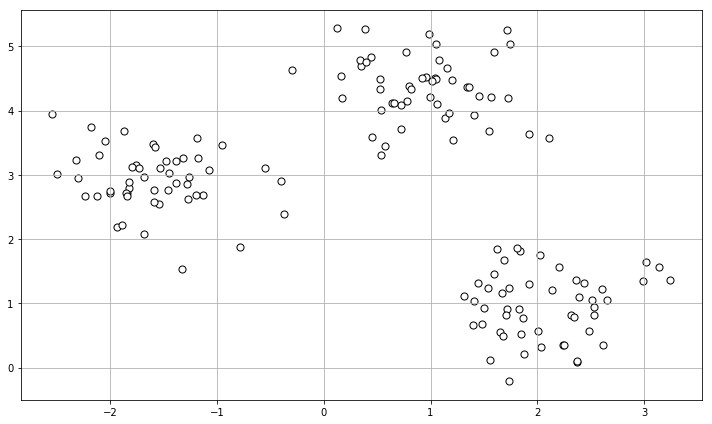

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', 
            edgecolor='black', s=50)
plt.grid()
plt.tight_layout()

## Silhouette analysis

Apply the k-means and fuzzy-c-means algorithm to the sample data. Intentionally specify one cluster too many compared to visual inspection of sample data

In [5]:
# Setup
n_clusters = 4
max_iter = 200
tol = 1e-04
random_state = 0

In [6]:
kmeans = KMeans(n_clusters=n_clusters,
                max_iter=max_iter,
                tol=tol,
                random_state=RANDOM_STATE)

kmeans_pred = kmeans.fit_predict(X)

In [7]:
fuzzy = FuzzyCMeans(n_clusters=n_clusters,
                    max_iter=max_iter,
                    tol=tol,
                    random_state=RANDOM_STATE)

fuzzy_pred = fuzzy.fit_predict(X)

Generate silhouette plots for each cluster

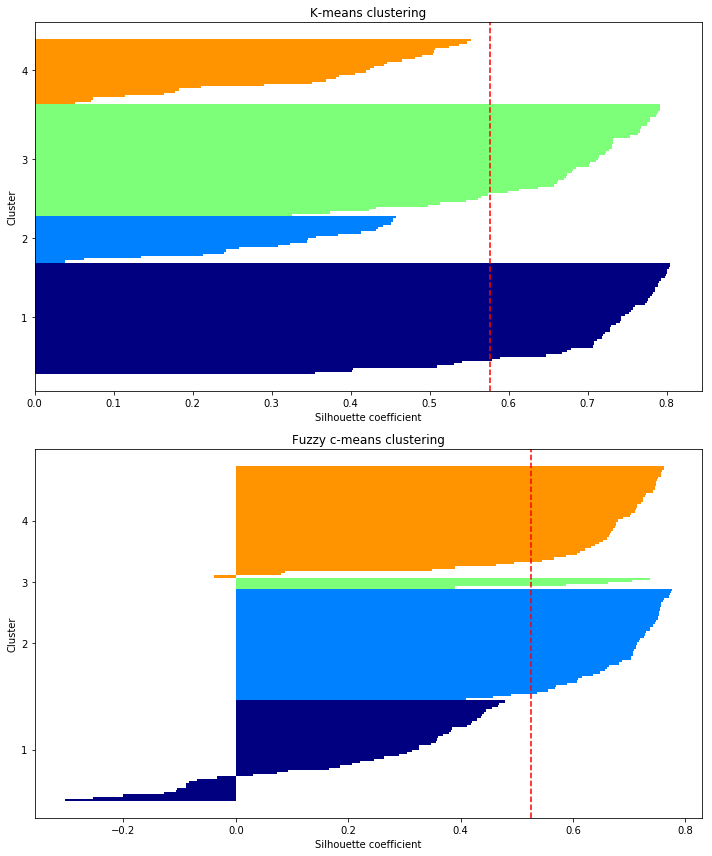

In [8]:
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
silhouette_plot(X, kmeans_pred)
plt.title('K-means clustering')

plt.subplot(2, 1, 2)
silhouette_plot(X, fuzzy_pred)
plt.title('Fuzzy c-means clustering')

plt.tight_layout()

## Model comparison

Comparing the cluster labels assigned by each algorithm to the input data points with the generated sample data labels.

In [9]:
kmeans_score = accuracy_score(y, kmeans_pred)
fuzzy_score = accuracy_score(y, fuzzy_pred)

print('K-means score: {}\nFuzzy c-means score: {:.2f}'.format(kmeans_score, 
                                                              fuzzy_score))

K-means score: 0.14
Fuzzy c-means score: 0.63
